In [14]:
from matplotlib import pylab as pylab
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, SimilarityTransform, AffineTransform, resize
import cv2
import numpy as np
from skimage import data
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
from skimage.measure import ransac

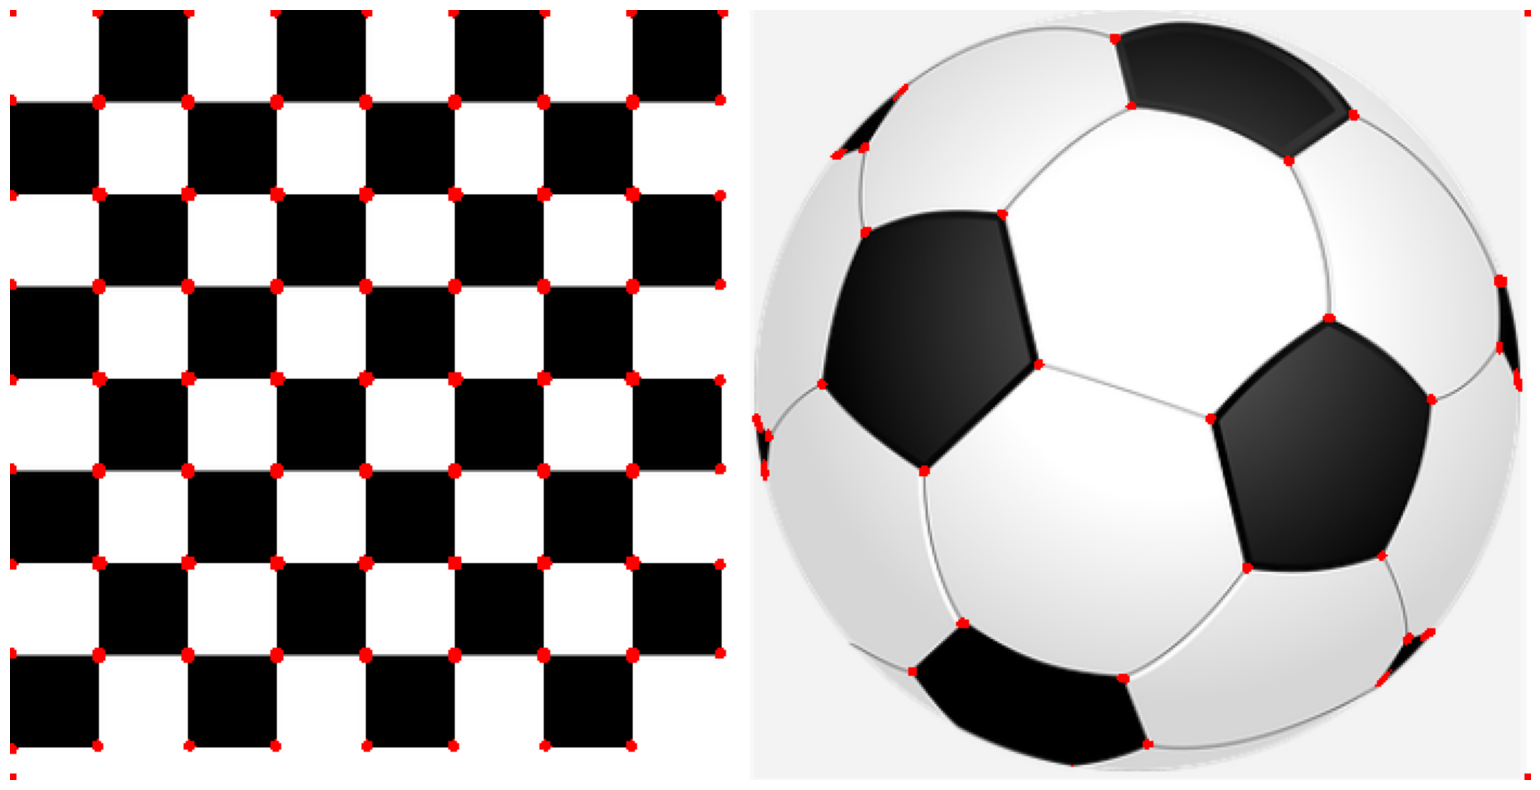

In [15]:
# Đọc ảnh từ file
image = imread('images/chess_football.png')

# Kiểm tra nếu ảnh có kênh Alpha (4 kênh), chỉ giữ lại 3 kênh đầu tiên (RGB)
if image.shape[2] == 4:
    image = image[..., :3]  # Chỉ giữ lại kênh RGB

# Chuyển đổi ảnh sang ảnh xám để phát hiện các góc
image_gray = rgb2gray(image)

# Tính toán các góc bằng thuật toán Harris với tham số k=0.001
coordinates = corner_harris(image_gray, k=0.001)

# Tạo một bản sao của ảnh gốc để không thay đổi ảnh ban đầu
image_result = np.copy(image)

# Đánh dấu các góc phát hiện được bằng cách thay đổi màu pixel tại các vị trí góc
# Với các điểm có giá trị góc lớn hơn ngưỡng 0.01 * giá trị lớn nhất, chuyển sang màu đỏ
image_result[coordinates > 0.01 * coordinates.max()] = [255, 0, 0]  # Màu đỏ

# Tạo khung hình lớn để hiển thị kết quả
pylab.figure(figsize=(20, 10))

# Hiển thị ảnh với các góc được đánh dấu màu đỏ
pylab.imshow(image_result)
pylab.axis('off')  # Tắt trục tọa độ
pylab.show()


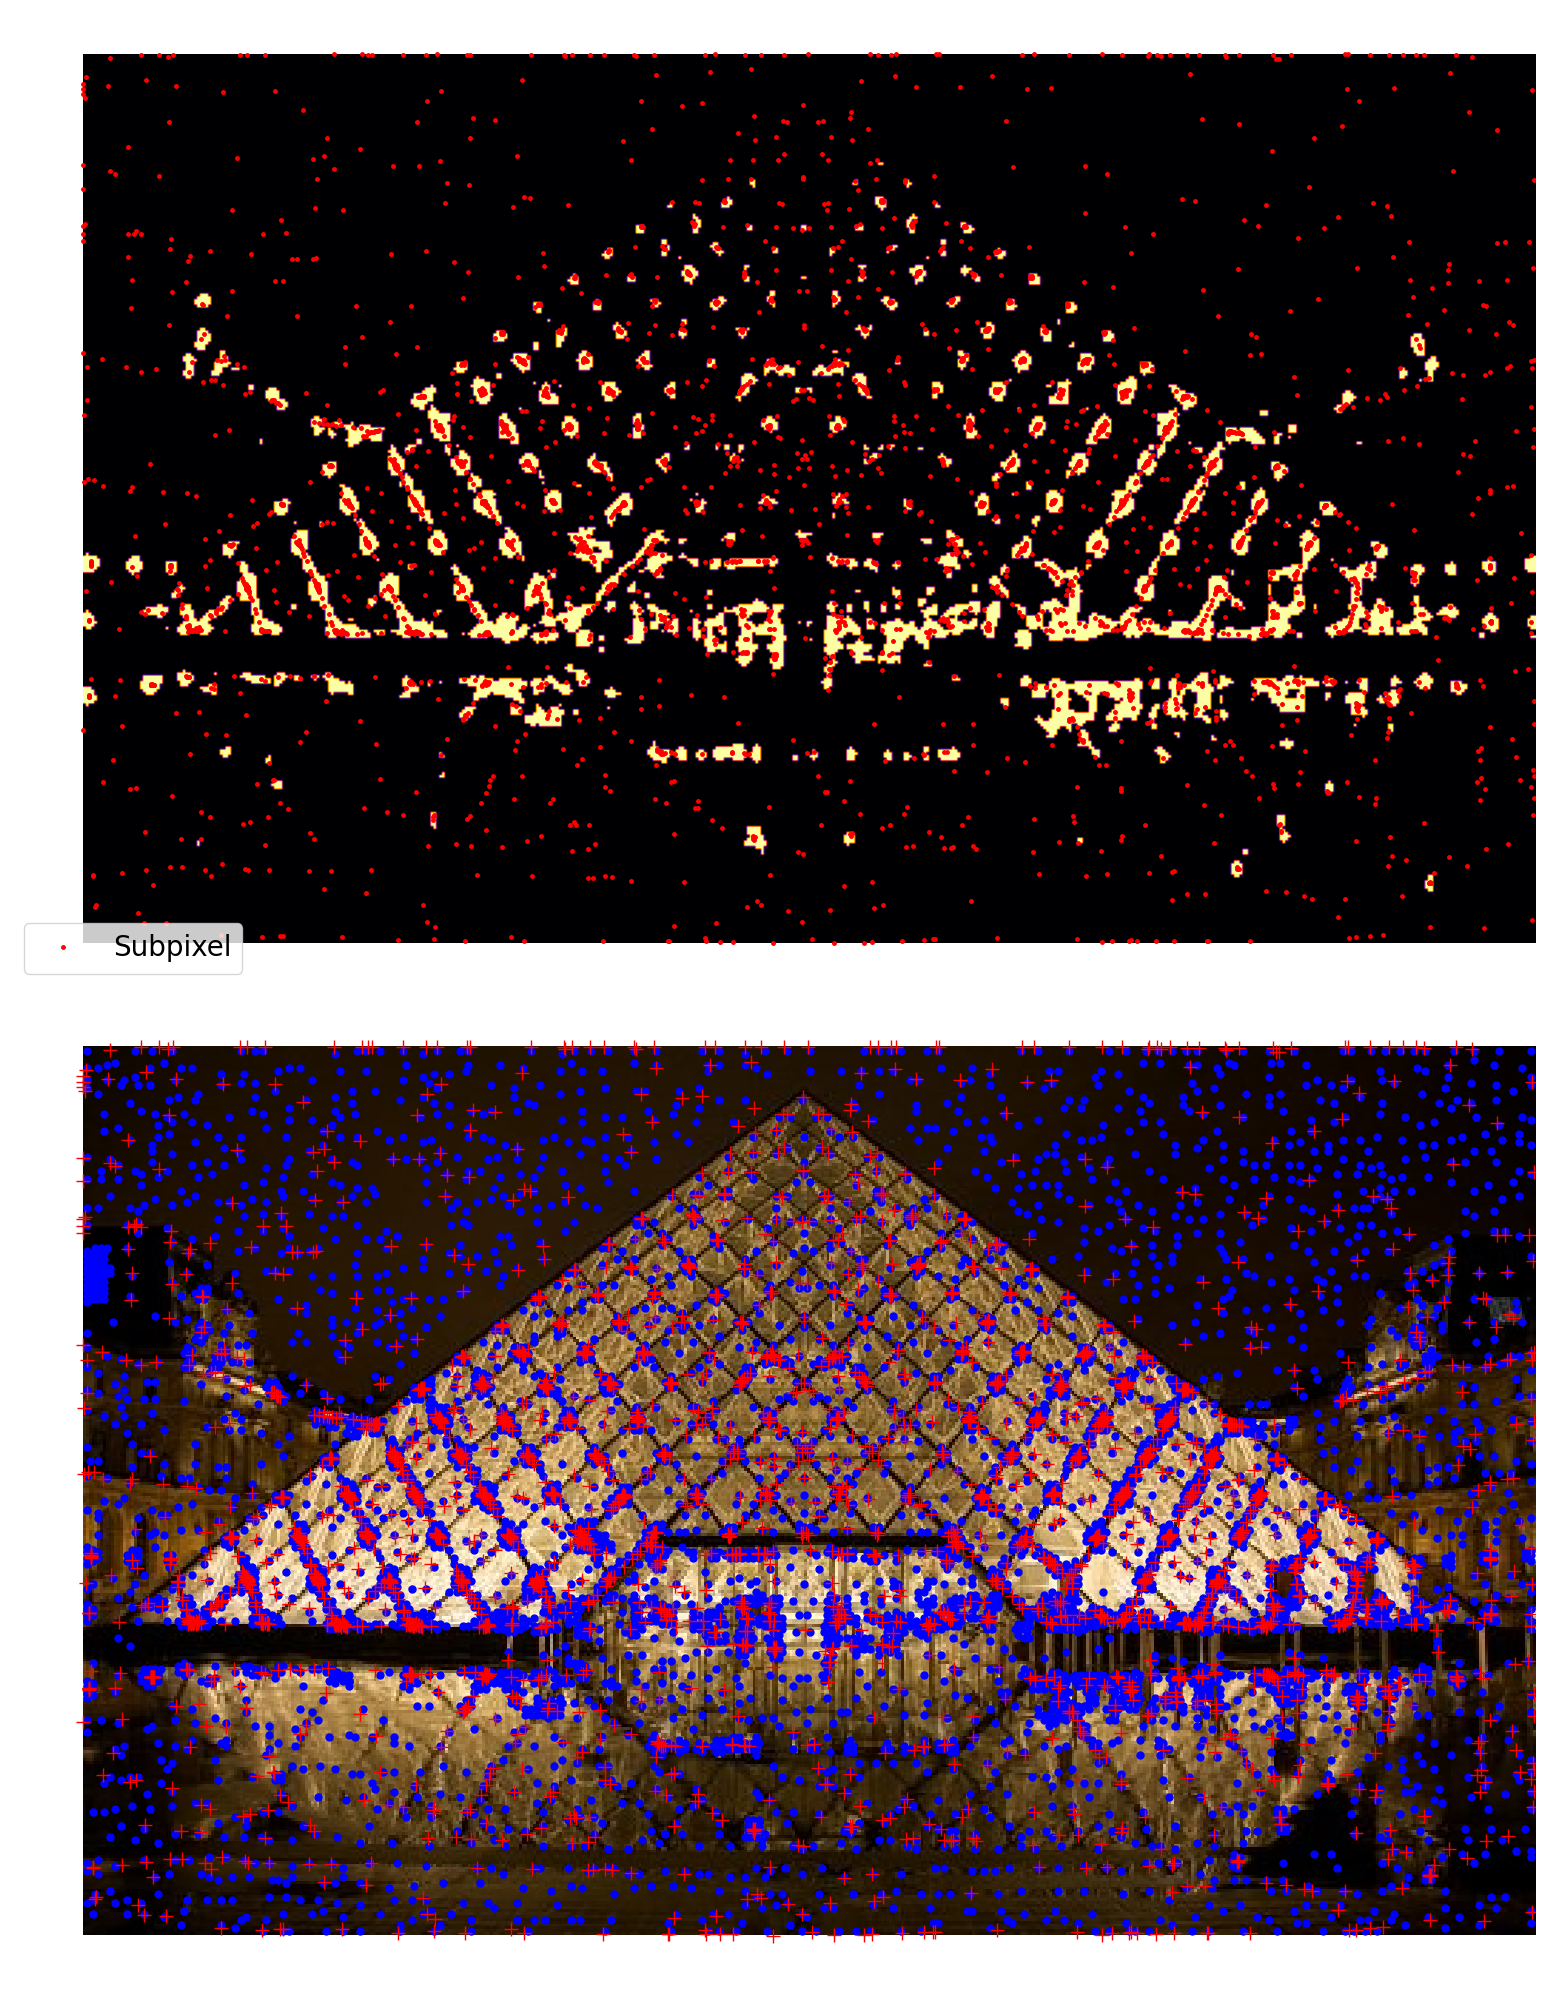

In [16]:
# Đọc ảnh từ file
image = imread('images/pyramids2.jpg')

# Chuyển đổi ảnh sang ảnh xám để tính toán các góc
image_gray = rgb2gray(image)

# Tính toán các góc bằng thuật toán Harris với tham số k=0.001
coordinates = corner_harris(image_gray, k=0.001)

# Đặt các vị trí có giá trị góc lớn hơn ngưỡng 0.03 * giá trị lớn nhất thành 255
# Điều này giúp làm nổi bật các vùng có giá trị góc cao
coordinates[coordinates > 0.03 * coordinates.max()] = 255

# Xác định tọa độ góc đỉnh (corner peaks) từ ảnh kết quả của Harris
corner_coordinates = corner_peaks(coordinates)

# Tính toán tọa độ subpixel chính xác của các góc với cửa sổ kích thước 11x11
coordinates_subpix = corner_subpix(image_gray, corner_coordinates, window_size=11)

# Tạo khung hình lớn để hiển thị các kết quả
pylab.figure(figsize=(20, 20))

# Hiển thị kết quả Harris với các vùng góc nổi bật
pylab.subplot(211)
pylab.imshow(coordinates, cmap='inferno')  # Sử dụng cmap 'inferno' để hiển thị các góc nổi bật
pylab.plot(coordinates_subpix[:, 1], coordinates_subpix[:, 0], 'r.', markersize=5, label='Subpixel')
pylab.legend(prop={'size': 20})  # Hiển thị chú thích cho các điểm subpixel
pylab.axis('off')  # Tắt trục tọa độ

# Hiển thị ảnh gốc với các tọa độ góc được đánh dấu
pylab.subplot(212)
pylab.imshow(image, interpolation='nearest')
# Đánh dấu góc bằng màu xanh
pylab.plot(corner_coordinates[:, 1], corner_coordinates[:, 0], 'bo', markersize=5) 
# Đánh dấu tọa độ subpixel bằng dấu cộng màu đỏ
pylab.plot(coordinates_subpix[:, 1], coordinates_subpix[:, 0], 'r+', markersize=10)  
pylab.axis('off')  # Tắt trục tọa độ

# Điều chỉnh bố cục và hiển thị kết quả
pylab.tight_layout()
pylab.show()


In [ ]:
# Đọc ảnh và chuyển đổi sang kiểu float với giá trị pixel trong khoảng [0, 1]
temple = rgb2gray(img_as_float(imread('images/temple.jpg')))
# Tạo một ảnh RGB với ba kênh, mỗi kênh có kích thước giống ảnh gốc
# Đặt tất cả các giá trị ban đầu của ảnh RGB mới thành 0
image_original = np.zeros(list(temple.shape) + [3])
# Đặt kênh đỏ (Red) bằng ảnh gốc đơn kênh (grayscale)
image_original[..., 0] = temple
# Tạo gradient theo hàng và cột để tạo hiệu ứng chuyển màu
gradient_row, gradient_col = (np.mgrid[0:image_original.shape[0], 0:image_original.shape[1]] 
                              / float(image_original.shape[0]))
# Đặt kênh xanh lá (Green) bằng gradient theo hàng và kênh xanh dương (Blue) bằng gradient theo cột
image_original[..., 1] = gradient_row
image_original[..., 2] = gradient_col
# Chuyển đổi cường độ ảnh thành giá trị nằm trong khoảng [0, 1]
image_original = rescale_intensity(image_original)
# Chuyển đổi ảnh RGB thành ảnh xám (grayscale) để phát hiện góc cạnh
image_original_gray = rgb2gray(image_original)
# Áp dụng phép biến đổi affine bao gồm thay đổi tỷ lệ, xoay và dịch chuyển
# scale=(0.8, 0.9): co ảnh lại theo hai trục x và y
# rotation=0.1: xoay ảnh một góc 0.1 radian
# translation=(120, -20): dịch chuyển ảnh 120 pixel sang phải và 20 pixel lên trên
affine_trans = AffineTransform(scale=(0.8, 0.9), rotation=0.1, translation=(120, -20))
# Áp dụng phép biến đổi affine ngược trên ảnh RGB gốc
image_warped = warp(image_original, affine_trans.inverse, output_shape=image_original.shape)
# Chuyển đổi ảnh biến đổi sang ảnh xám để phát hiện góc cạnh
image_warped_gray = rgb2gray(image_warped)
# Phát hiện các góc trong ảnh gốc bằng thuật toán Harris
coordinates = corner_harris(image_original_gray)
# Đặt ngưỡng để chỉ giữ lại các giá trị góc lớn nhất cho dễ nhìn
coordinates[coordinates > 0.01 * coordinates.max()] = 1
# Tìm tọa độ đỉnh góc từ kết quả Harris
coordinates_original = corner_peaks(coordinates, threshold_rel=0.0001, min_distance=5)
# Phát hiện các góc trong ảnh đã biến đổi
coordinates = corner_harris(image_warped_gray)
# Đặt ngưỡng để giữ lại các góc có giá trị cao nhất trong ảnh đã biến đổi
coordinates[coordinates > 0.01 * coordinates.max()] = 1
# Tìm tọa độ đỉnh góc từ kết quả Harris cho ảnh đã biến đổi
coordinates_warped = corner_peaks(coordinates, threshold_rel=0.0001, min_distance=5)


In [18]:
# Tính toán tọa độ góc với độ chính xác subpixel cho ảnh gốc
# Sử dụng cửa sổ kích thước 9x9 để làm mịn và cải thiện độ chính xác tọa độ góc
coordinates_original_subpix = corner_subpix(image_original_gray, coordinates_original, window_size=9)

# Tính toán tọa độ góc với độ chính xác subpixel cho ảnh đã biến đổi
# Sử dụng cùng kích thước cửa sổ 9x9 cho độ chính xác tốt hơn
coordinates_warped_subpix = corner_subpix(image_warped_gray, coordinates_warped, window_size=9)

# Định nghĩa hàm để tạo trọng số Gaussian cho cửa sổ hình vuông
# `window_ext`: bán kính của cửa sổ, tạo một cửa sổ kích thước (2*window_ext + 1) x (2*window_ext + 1)
# `sigma`: độ lệch chuẩn của hàm Gaussian, xác định mức độ mịn của trọng số
def gaussian_weights(window_ext, sigma=1):
    # Tạo lưới tọa độ trong khoảng từ `-window_ext` đến `window_ext`
    y, x = np.mgrid[-window_ext:window_ext+1, -window_ext:window_ext+1]
    
    # Tạo mảng trọng số Gaussian có cùng kích thước với lưới tọa độ
    g_w = np.zeros(y.shape, dtype=np.double)
    
    # Tính trọng số Gaussian cho mỗi tọa độ (x, y)
    g_w[:] = np.exp(-0.5 * (x**2 / sigma**2 + y**2 / sigma**2))
    
    # Chuẩn hóa trọng số để tổng tất cả giá trị bằng 1
    g_w /= 2 * np.pi * sigma * sigma
    
    return g_w  # Trả về mảng trọng số Gaussian

def match_corner(coordinates, window_ext=3):
    # Lấy tọa độ hàng và cột và làm tròn về kiểu integer
    row, col = np.round(coordinates).astype(np.intp)
    
    # Trích xuất cửa sổ xung quanh tọa độ từ ảnh gốc
    # Đảm bảo rằng `col - window_ext` thay vì `colwindow_ext`
    window_original = image_original[row - window_ext:row + window_ext + 1, col - window_ext:col + window_ext + 1, :]
    
    # Tạo trọng số Gaussian cho cửa sổ
    weights = gaussian_weights(window_ext, 3)
    weights = np.dstack((weights, weights, weights))
    
    # Tạo danh sách lưu các giá trị SSD (Sum of Squared Differences)
    SSDs = []
    
    # Lặp qua tất cả tọa độ trong `coordinates_warped`
    for coord_row, coord_col in coordinates_warped:
        # Trích xuất cửa sổ tương ứng từ ảnh đã bị biến đổi
        # Đảm bảo rằng `coord_col - window_ext` thay vì `coord_colwindow_ext`
        window_warped = image_warped[coord_row - window_ext:coord_row + window_ext + 1, coord_col - window_ext:coord_col + window_ext + 1, :]
        
        # Kiểm tra xem các cửa sổ có cùng kích thước không
        if window_original.shape == window_warped.shape:
            # Tính toán SSD cho cặp cửa sổ và thêm vào danh sách SSDs
            SSD = np.sum(weights * (window_original - window_warped) ** 2)
            SSDs.append(SSD)
    
    # Tìm chỉ số của SSD nhỏ nhất nếu có
    min_idx = np.argmin(SSDs) if len(SSDs) > 0 else -1
    
    # Trả về tọa độ subpixel tương ứng nếu có, hoặc `[None]` nếu không tìm thấy
    return coordinates_warped_subpix[min_idx] if min_idx >= 0 else [None]

In [ ]:
from skimage.transform import AffineTransform
from skimage.measure import ransac

# Khởi tạo các danh sách để lưu các tọa độ góc từ ảnh gốc và ảnh biến đổi
source, destination = [], []

# Lặp qua tất cả tọa độ subpixel trong ảnh gốc
for coordinates in coordinates_original_subpix:
    # Gọi hàm match_corner để tìm tọa độ tương ứng trong ảnh biến dạng
    coordinates1 = match_corner(coordinates)
    
    # Kiểm tra xem coordinates1 có giá trị hợp lệ không (không phải None và là mảng numpy)
    if coordinates1 is not None and isinstance(coordinates1, np.ndarray) and len(coordinates1) > 0:
        # Kiểm tra nếu không phải tất cả các phần tử đều là NaN
        if not np.isnan(coordinates1).all():
            # Thêm các tọa độ góc vào danh sách source và destination
            source.append(coordinates)
            destination.append(coordinates1)

# Chuyển đổi source và destination thành các mảng numpy
source = np.array(source)
destination = np.array(destination)

# Tạo một mô hình biến đổi affine và ước lượng các tham số từ source và destination
model = AffineTransform()
model.estimate(source, destination)

# Sử dụng thuật toán RANSAC để tìm mô hình affine tốt nhất giữa source và destination
# `min_samples=3`: yêu cầu ít nhất 3 điểm mẫu để xác định mô hình
# `residual_threshold=2`: ngưỡng để xác định các điểm inlier
# `max_trials=100`: số lần thử tối đa của RANSAC
model_robust, inliers = ransac((source, destination), AffineTransform,
                               min_samples=3, residual_threshold=2, max_trials=100)

# Xác định các outliers (điểm ngoài), những điểm không khớp với mô hình
outliers = inliers == False

# In ra các tham số của phép biến đổi affine ban đầu
print("Initial Affine Transform parameters (scale, translation, rotation):")
print(affine_trans.scale, affine_trans.translation, affine_trans.rotation)

# In ra các tham số của mô hình affine được ước lượng từ `source` và `destination`
print("Estimated Affine Transform parameters (scale, translation, rotation):")
print(model.scale, model.translation, model.rotation)

# In ra các tham số của mô hình robust affine từ RANSAC, để loại bỏ các outliers
print("RANSAC Robust Affine Transform parameters (scale, translation, rotation):")
print(model_robust.scale, model_robust.translation, model_robust.rotation)

Initial Affine Transform parameters (scale, translation, rotation):
[0.8 0.9] [120. -20.] 0.09999999999999999
Estimated Affine Transform parameters (scale, translation, rotation):
[0.89784679 0.80693577] [-19.77501597 115.26859498] -0.1023610569581359
RANSAC Robust Affine Transform parameters (scale, translation, rotation):
[0.9002     0.80007774] [-19.92516431 119.78568256] -0.09984904108973319


C:\Users\vuklu\AppData\Local\Temp\ipykernel_17672\3057635126.py:29: RuntimeWarning: invalid value encountered in cast
  row, col = np.round(coordinates).astype(np.intp)
C:\Users\vuklu\AppData\Local\Temp\ipykernel_17672\3057635126.py:33: RuntimeWarning: overflow encountered in scalar subtract
  window_original = image_original[row - window_ext:row + window_ext + 1, col - window_ext:col + window_ext + 1, :]


C:\Users\vuklu\AppData\Local\Temp\ipykernel_17672\1472825539.py:15: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(axes[0], image_original_gray, image_warped_gray, source,
C:\Users\vuklu\AppData\Local\Temp\ipykernel_17672\1472825539.py:28: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(axes[1], image_original_gray, image_warped_gray, source,


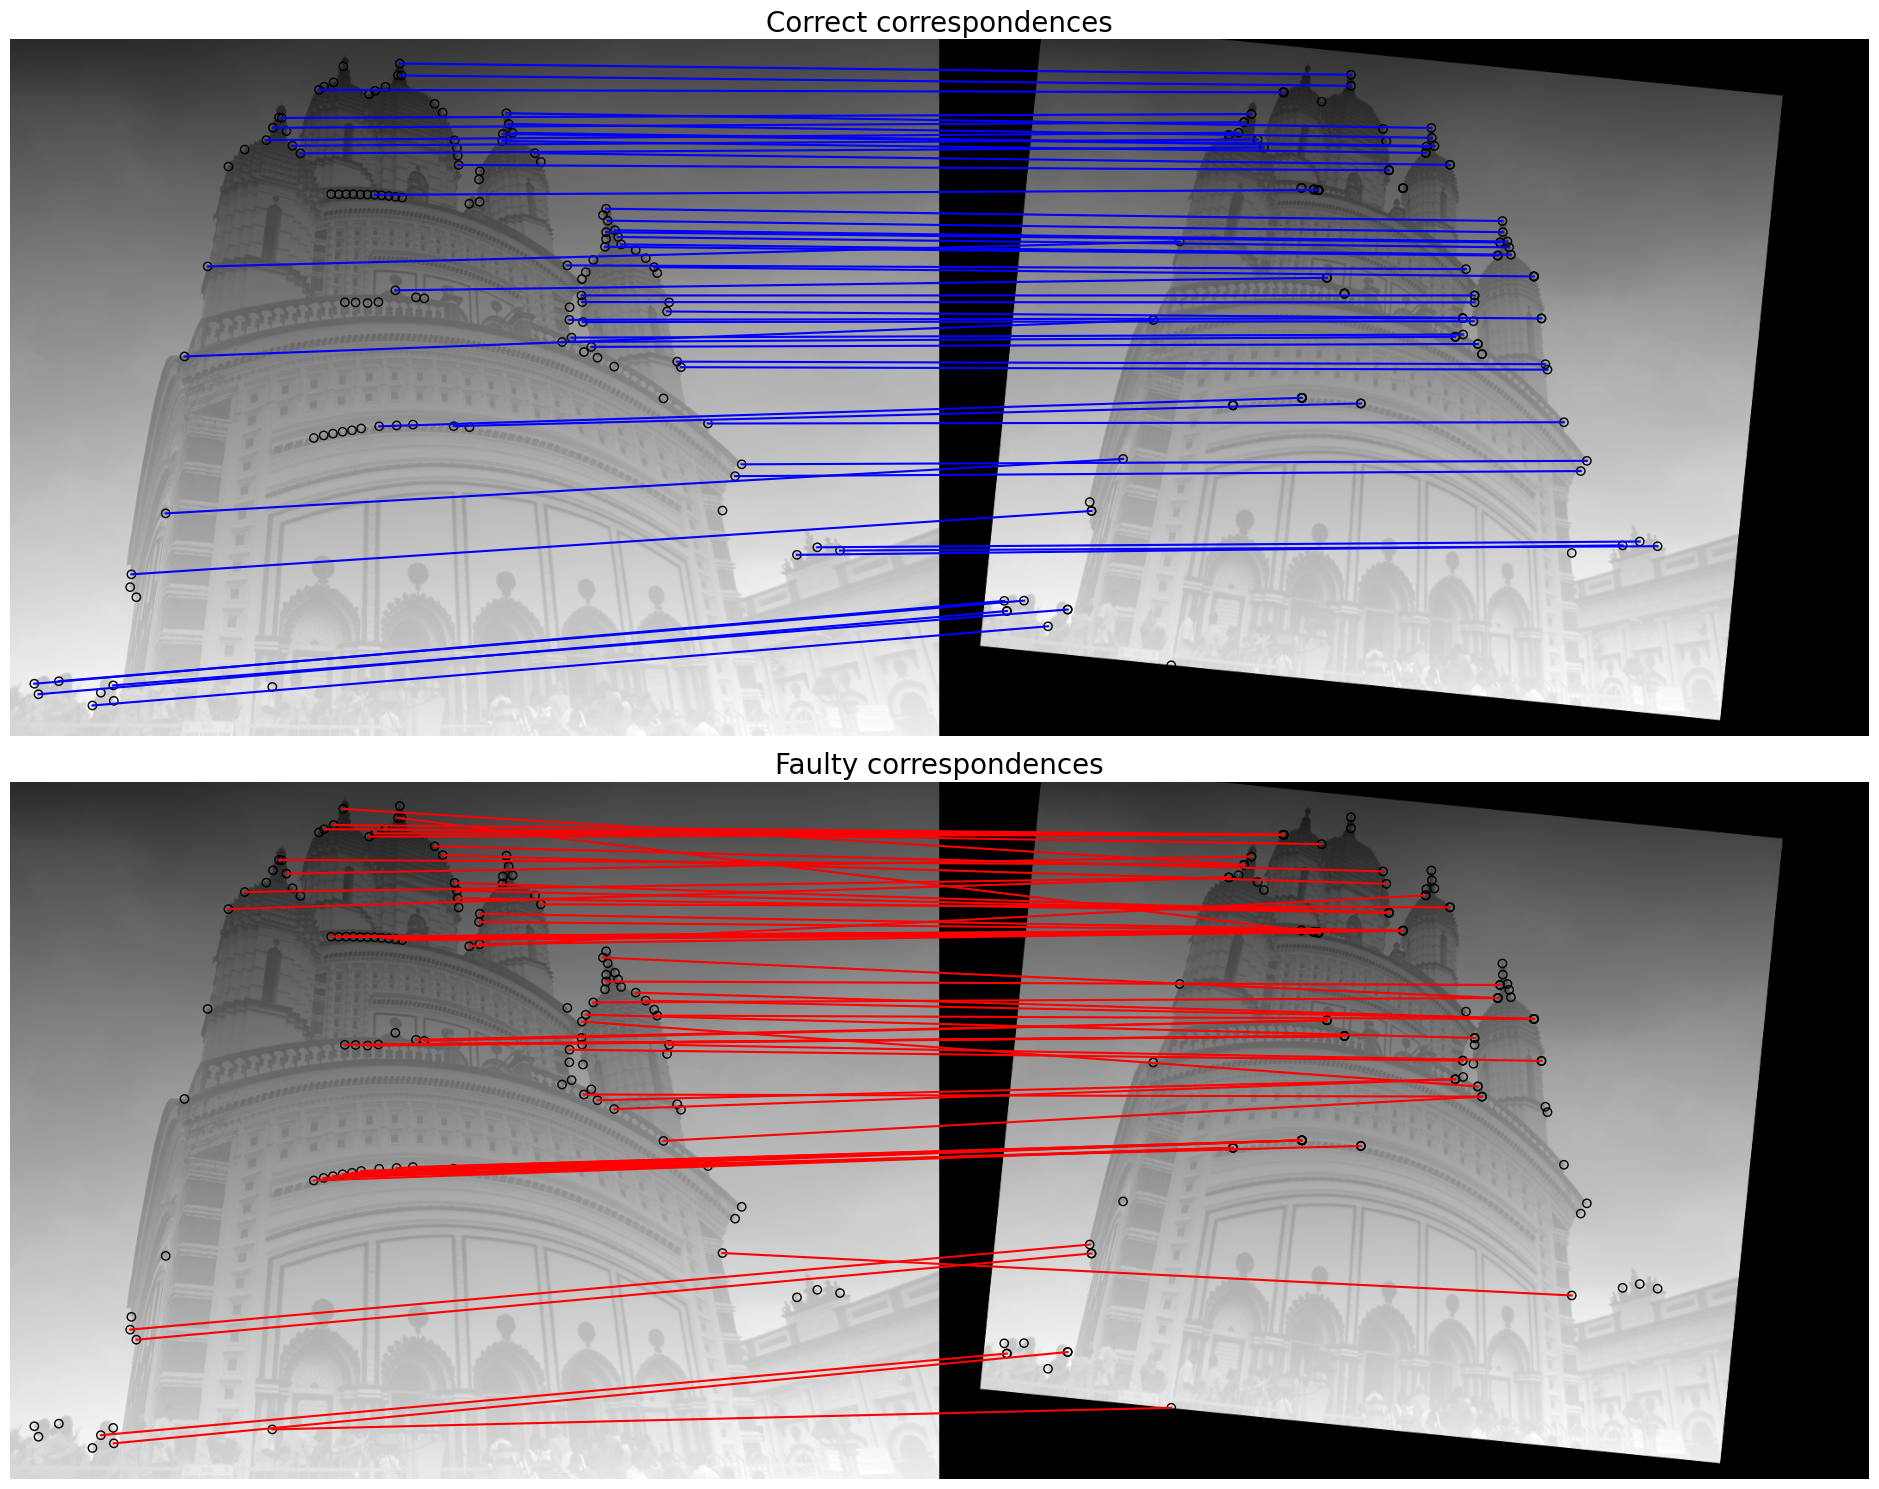

In [21]:
from skimage.feature import plot_matches
# Tạo một hình có hai khung để hiển thị các kết quả
# `nrows=2`, `ncols=1`: tạo một bố cục với 2 hàng, 1 cột
fig, axes = pylab.subplots(nrows=2, ncols=1, figsize=(20, 15))

# Đặt chế độ hiển thị ảnh là ảnh xám
pylab.gray()

# Lấy các chỉ số của các điểm inliers (điểm phù hợp với mô hình)
inlier_idxs = np.nonzero(inliers)[0]

# Hiển thị các điểm inliers trên ảnh
# `plot_matches`: hàm vẽ các cặp điểm khớp giữa hai ảnh
# `matches_color='b'`: sử dụng màu xanh để đánh dấu các điểm inliers
plot_matches(axes[0], image_original_gray, image_warped_gray, source,
             destination, np.column_stack((inlier_idxs, inlier_idxs)),
             matches_color='b')

# Tắt trục tọa độ và đặt tiêu đề cho khung đầu tiên
axes[0].axis('off')
axes[0].set_title('Correct correspondences', size=20)

# Lấy các chỉ số của các điểm outliers (điểm không phù hợp với mô hình)
outlier_idxs = np.nonzero(outliers)[0]

# Hiển thị các điểm outliers trên ảnh
# `matches_color='r'`: sử dụng màu đỏ để đánh dấu các điểm outliers
plot_matches(axes[1], image_original_gray, image_warped_gray, source,
             destination, np.column_stack((outlier_idxs, outlier_idxs)),
             matches_color='r')

# Tắt trục tọa độ và đặt tiêu đề cho khung thứ hai
axes[1].axis('off')
axes[1].set_title('Faulty correspondences', size=20)

# Tự động điều chỉnh bố cục để các khung không bị chồng lấn
fig.tight_layout()

# Hiển thị hình
pylab.show()
